# Munging 
This notebook will combine the Toronto postal codes with the Foursquare attraction data.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
from sklearn.cluster import KMeans
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors
import branca
import branca.colormap as cm1
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Functions
    
def getNearbyVenues(names, latitudes, longitudes, CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT,radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        name = str(name)
        lat = float(lat)
        lng = float(lng)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

def plotElbow(df):
    krng = range(2,11)
    kmods = [KMeans(n_clusters=k, random_state=2020).fit(df.values) for k in krng]
    twcss = [n.inertia_ for n in kmods]
    kdf = pd.DataFrame(columns = ['TWCSS', 'k'])
    kdf['TWCSS'] = twcss
    kdf['k'] = list(krng)
    sns.lineplot(data=kdf,x = 'k', y = 'TWCSS')

In [3]:
gdf = pd.read_csv('../data/scraped_geo.csv')#geographic coordinates of zipcodes in Toronto

The code below will obtain and tidy the data from Foursqaure for each coordinate.

In [4]:
CLIENT_ID = 'EWDLR1T5RO4PWLFBK5GEM4C4G3E0LCZPBQA4XVSZ2DHTBVB0' # your Foursquare ID
CLIENT_SECRET = 'LHM5RQGPNV21OOOBV2F0XFUFXY5WYYSK2EMHG2U2EUF3BYUI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500

names = gdf['PostalCode']
latitudes = gdf['Latitude']
longitudes = gdf['Longitude']

venues = getNearbyVenues(names, latitudes, longitudes, CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT, radius=radius)

M3A
M4A
M5A
M6A
M7A
M9A
M1B
M3B
M4B
M5B
M6B
M9B
M1C
M3C
M4C
M5C
M6C
M9C
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M4H
M5H
M6H
M1J
M2J
M3J
M4J
M5J
M6J
M1K
M2K
M3K
M4K
M5K
M6K
M1L
M2L
M3L
M4L
M5L
M6L
M9L
M1M
M2M
M3M
M4M
M5M
M6M
M9M
M1N
M2N
M3N
M4N
M5N
M6N
M9N
M1P
M2P
M4P
M5P
M6P
M9P
M1R
M2R
M4R
M5R
M6R
M7R
M9R
M1S
M4S
M5S
M6S
M1T
M4T
M5T
M1V
M4V
M5V
M8V
M9V
M1W
M4W
M5W
M8W
M9W
M1X
M4X
M5X
M8X
M4Y
M7Y
M8Y
M8Z


In [5]:
venues.groupby('Postal Code').count()

Postal Code Latitude  Postal Code Longitude  Venue  \
Postal Code                                                       
M1B                             1                      1      1   
M1C                             2                      2      2   
M1E                             8                      8      8   
M1G                             4                      4      4   
M1H                             8                      8      8   
M1J                             3                      3      3   
M1K                             4                      4      4   
M1L                            10                     10     10   
M1M                             2                      2      2   
M1N                             4                      4      4   
M1P                             5                      5      5   
M1R                             6                      6      6   
M1S                             5                      5      5   
M1T                            12                     12     12   
M1V                             3                      3      3   
M1W                            12                     12     12   
M2H                             5                      5      5   
M2J                            70                     70     70   
M2K                             4                      4      4   
M2L                             1                      1      1   
M2N                            33                     33     33   
M2P                             2                      2      2   
M2R                             5                      5      5   
M3A                             2                      2      2   
M3B                             4                      4      4   
M3C                            19                     19     19   
M3H                            21                     21     21   
M3J                             7                      7      7   
M3K                             2                      2      2   
M3L                             6                      6      6   
M3M                             4                      4      4   
M3N                             4                      4      4   
M4A                             5                      5      5   
M4B                            11                     11     11   
M4C                             8                      8      8   
M4E                             4                      4      4   
M4G                            33                     33     33   
M4H                            24                     24     24   
M4J                             3                      3      3   
M4K                            43                     43     43   
M4L                            19                     19     19   
M4M                            37                     37     37   
M4N                             3                      3      3   
M4P                             9                      9      9   
M4R                            18                     18     18   
M4S                            33                     33     33   
M4T                             2                      2      2   
M4V                            14                     14     14   
M4W                             4                      4      4   
M4X                            48                     48     48   
M4Y                            75                     75     75   
M5A                            44                     44     44   
M5B                           100                    100    100   
M5C                            85                     85     85   
M5E                            55                     55     55   
M5G                            68                     68     68   
M5H                           100                    100    100   
M5J                           100                    100    

If any postal codes have ten or fewer venues, they will be filtered out.

In [6]:
goodcodes = venues.groupby('Postal Code').count()[venues.groupby('Postal Code').count()['Venue'] > 10].index
venuedf = pd.DataFrame()
for code in goodcodes:
    venuedf = venuedf.append(venues[venues['Postal Code'].isin([code])])   

In [7]:
onehot = pd.get_dummies(venuedf[['Venue Category']], prefix="", prefix_sep="")#making the matrix numeric for each postal code
onehot['Postal Code'] = venuedf['Postal Code'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]#moves PC to first column

In [8]:
onehot.shape

(1909, 253)

In [9]:
grouped_m = onehot.groupby('Postal Code').mean().reset_index()
grouped_m.index = grouped_m['Postal Code']
grouped_m = grouped_m.drop(columns='Postal Code')
grouped_m.head()

Accessories Store  Afghan Restaurant  Airport  \
Postal Code                                                  
M1T                        0.0                0.0      0.0   
M1W                        0.0                0.0      0.0   
M2J                        0.0                0.0      0.0   
M2N                        0.0                0.0      0.0   
M3C                        0.0                0.0      0.0   

             Airport Food Court  Airport Gate  Airport Lounge  \
Postal Code                                                     
M1T                         0.0           0.0             0.0   
M1W                         0.0           0.0             0.0   
M2J                         0.0           0.0             0.0   
M2N                         0.0           0.0             0.0   
M3C                         0.0           0.0             0.0   

             Airport Service  Airport Terminal  American Restaurant  \
Postal Code                                                           
M1T                      0.0               0.0             0.000000   
M1W                      0.0               0.0             0.000000   
M2J                      0.0               0.0             0.014286   
M2N                      0.0               0.0             0.000000   
M3C                      0.0               0.0             0.000000   

             Antique Shop  Aquarium  Art Gallery  Art Museum  \
Postal Code                                                    
M1T                   0.0       0.0     0.000000         0.0   
M1W                   0.0       0.0     0.000000         0.0   
M2J                   0.0       0.0     0.000000         0.0   
M2N                   0.0       0.0     0.000000         0.0   
M3C                   0.0       0.0     0.052632         0.0   

             Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
Postal Code                                                              
M1T                     0.000000          0.000000                 0.0   
M1W                     0.000000          0.000000                 0.0   
M2J                     0.000000          0.014286                 0.0   
M2N                     0.030303          0.000000                 0.0   
M3C                     0.000000          0.052632                 0.0   

             Auto Workshop  BBQ Joint  Baby Store  Bagel Shop    Bakery  \
Postal Code                                                               
M1T                    0.0        0.0         0.0         0.0  0.000000   
M1W                    0.0        0.0         0.0         0.0  0.000000   
M2J                    0.0        0.0         0.0         0.0  0.028571   
M2N                    0.0        0.0         0.0         0.0  0.000000   
M3C                    0.0        0.0         0.0         0.0  0.000000   

                 Bank       Bar  Baseball Field  Baseball Stadium  \
Postal Code                                                         
M1T          0.083333  0.000000        0.000000               0.0   
M1W          0.083333  0.000000        0.000000               0.0   
M2J          0.028571  0.014286        0.014286               0.0   
M2N          0.000000  0.000000        0.000000               0.0   
M3C          0.000000  0.000000        0.000000               0.0   

             Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
Postal Code                                                                     
M1T                         0.0    0.0              0.0       0.0    0.000000   
M1W                         0.0    0.0              0.0       0.0    0.000000   
M2J                         0.0    0.0              0.0       0.0    0.000000   
M2N                         0.0    0.0              0.0       0.0    0.000000   
M3C                         0.0    0.0              0.0       0.0    0.105263   

             Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  Bookstore  

The code below will analyze how many zero values are in each column and row

In [10]:
col0df = row0df = pd.DataFrame()
#Columns
for col in grouped_m.columns:
    col0df = col0df.append(pd.DataFrame({'Column':[col],\
                                         'Percent 0': [100*sum(grouped_m[col]==0)/len(grouped_m[col])]}))
print('Zero Percentages in Columns: ')
print(col0df.sort_values(['Percent 0']).reset_index(drop = True).head(10))

#Rows
for row in grouped_m.index:
    row0df = row0df.append(pd.DataFrame({'Row':[row],\
                                         'Percent 0': [100*sum(grouped_m.loc[row]==0)/len(grouped_m.loc[row])]}))
print('Zero Percentages in Rows: ')
print(row0df.sort_values(['Percent 0']).reset_index(drop = True).head(10))

Zero Percentages in Columns: 
               Column  Percent 0
0         Coffee Shop  13.043478
1          Restaurant  26.086957
2                Café  34.782609
3         Pizza Place  45.652174
4      Sandwich Place  45.652174
5  Italian Restaurant  47.826087
6                Park  50.000000
7              Bakery  52.173913
8    Sushi Restaurant  54.347826
9                 Gym  58.695652
Zero Percentages in Rows: 
   Row  Percent 0
0  M5B  74.603175
1  M5H  75.000000
2  M5J  76.587302
3  M5W  76.587302
4  M5L  78.571429
5  M5K  78.571429
6  M5C  78.571429
7  M5X  79.365079
8  M4Y  79.761905
9  M5T  80.555556


It appears that coffeeshops are the most prevalent in the dataset! However after examining the results, the dataset does appear to be a bit sparse. Next, kmeans clustering will be done to pick the optimal number of k (or neighborhood types).

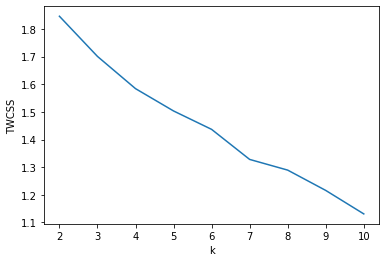

In [11]:
plotElbow(grouped_m)

Interestingly, k = 7 seems to be the optimal number of clusters. We will choose 7 different neighborhood types going further in the analysis.

Kmeans will be ran below to figure out which cluster has the most coffee shops.

In [12]:
k=7
kmeans = KMeans(n_clusters=k, random_state=2020).fit(grouped_m)
labeldf = pd.DataFrame()
labeldf['Postal Code'] = grouped_m.index
labeldf['Cluster Number'] = kmeans.labels_

In [13]:
labeldf.head()

Postal Code  Cluster Number
0         M1T               6
1         M1W               3
2         M2J               3
3         M2N               0
4         M3C               3

In [14]:
grouped_m['Postal Code'] = grouped_m.index
grouped_m = grouped_m.reset_index(drop = True)
joindf = grouped_m.merge(labeldf)

In [15]:
joindf.groupby(['Cluster Number']).mean()['Coffee Shop']

Cluster Number
0    0.119310
1    0.076923
2    0.000000
3    0.066145
4    0.062500
5    0.076992
6    0.000000
Name: Coffee Shop, dtype: float64

Cluster 0 has the most coffee shops. We will examine the zipcodes within cluster 0.

In [16]:
print(str(len(labeldf['Postal Code'][labeldf['Cluster Number']==0]))+' of the '+ str(labeldf.shape[0])\
      +' postal codes are in cluster 0')

17 of the 46 postal codes are in cluster 0


Next the number of coffee shops within each postal code will be examined.

In [17]:
c0df = joindf.loc[joindf['Cluster Number']==0][['Coffee Shop','Postal Code']].sort_values(by = ['Coffee Shop'])
c0df

Coffee Shop Postal Code
3      0.060606         M2N
19     0.070588         M5C
22     0.080000         M5H
11     0.081081         M4M
18     0.090000         M5B
20     0.090909         M5E
9      0.093023         M4K
16     0.093333         M4Y
31     0.104167         M5W
32     0.110000         M5X
23     0.130000         M5J
25     0.130000         M5L
24     0.140000         M5K
42     0.153846         M7R
21     0.176471         M5G
17     0.181818         M5A
41     0.242424         M7A

M2N, M5C, M5H, M4M, M5B are potential candidates to invest in. The postal codes with the least number of coffee shops within the cluster are chosen because it is assumed the ones with the higher frequencies have more of a saturated market. Next the postal codes are displayed on a map.

In [18]:
df1 = gdf[gdf['PostalCode'].isin(c0df['Postal Code'])]
df1.insert(1, column = 'Postal Code', value = df1['PostalCode'])
df1 = df1.drop(['PostalCode'], axis = 1)
df2 = joindf[['Coffee Shop', 'Cluster Number', 'Postal Code']]
mapdf = df1.merge(df2)
mapdf.sort_values(['Coffee Shop'])

Postal Code           Borough  \
12         M2N        North York   
3          M5C  Downtown Toronto   
6          M5H  Downtown Toronto   
11         M4M      East Toronto   
2          M5B  Downtown Toronto   
4          M5E  Downtown Toronto   
8          M4K      East Toronto   
16         M4Y  Downtown Toronto   
14         M5W  Downtown Toronto   
15         M5X  Downtown Toronto   
10         M5L  Downtown Toronto   
7          M5J  Downtown Toronto   
9          M5K  Downtown Toronto   
13         M7R       Mississauga   
5          M5G  Downtown Toronto   
0          M5A  Downtown Toronto   
1          M7A  Downtown Toronto   

                                         Neighborhood   Latitude  Longitude  \
12                        Willowdale, Willowdale East  43.770120 -79.408493   
3                                      St. James Town  43.651494 -79.375418   
6                            Richmond, Adelaide, King  43.650571 -79.384568   
11                                    Studio District  43.659526 -79.340923   
2                            Garden District, Ryerson  43.657162 -79.378937   
4                                         Berczy Park  43.644771 -79.373306   
8                        The Danforth West, Riverdale  43.679557 -79.352188   
16                               Church and Wellesley  43.665860 -79.383160   
14                                     Stn A PO Boxes  43.646435 -79.374846   
15             First Canadian Place, Underground city  43.648429 -79.382280   
10                     Commerce Court, Victoria Hotel  43.648198 -79.379817   
7   Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752   
9            Toronto Dominion Centre, Design Exchange  43.647177 -79.381576   
13              Canada Post Gateway Processing Centre  43.636966 -79.615819   
5                                  Central Bay Street  43.657952 -79.387383   
0                           Regent Park, Harbourfront  43.654260 -79.360636   
1         Queen's Park, Ontario Provincial Government  43.662301 -79.389494   

    Coffee Shop  Cluster Number  
12     0.060606               0  
3      0.070588               0  
6      0.080000               0  
11     0.081081               0  
2      0.090000               0  
4      0.090909               0  
8      0.093023               0  
16     0.093333               0  
14     0.104167               0  
15     0.110000               0  
10     0.130000               0  
7      0.130000               0  
9      0.140000               0  
13     0.153846               0  
5      0.176471               0  
0      0.181818               0  
1      0.242424               0

In [26]:
latitude = np.mean(mapdf['Latitude'])
longitude = np.mean(mapdf['Longitude'])

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


colormap = cm1.LinearColormap(colors=['red','blue'], index=[min(mapdf['Coffee Shop']),\
                                                                 max(mapdf['Coffee Shop'])],\
                                                                vmin=min(mapdf['Coffee Shop'])\
                                                                                 ,vmax=max(mapdf['Coffee Shop']))

for lat, lon, poi, freq, pst in zip(mapdf['Latitude'], \
                                  mapdf['Longitude'], mapdf['Neighborhood'], mapdf['Coffee Shop']\
                              , mapdf['Postal Code']):
    label = folium.Popup(str(poi)+';\nCoffee Shop Frequency: '+ str(round(100*freq,2))+'%;'\
                         + '\nPostal Code:'+ pst, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colormap(freq)).add_to(map_clusters)

map_clusters.save('../plots/map.html')
map_clusters

The areas of interest are in red. One observation right away is postal code M2N in North York. It is outside of the downtown area, but shows the most potential because of the similarity in characteristics (i.e. venues) to areas with coffeeshops that are dense. Another noticable one is St. James town in downtown. One could explore more thoroughly if actually pursuing investment.

The last and final question to be addressed is: what is a coffee shop? The names of the coffee shops within cluster 0 will be investigated to see what types of coffeeshops are within each postal code. The most frequent venues within the zipcodes will be found afterwards.

In [20]:
coffeedf = venuedf[venuedf['Postal Code'].isin(c0df['Postal Code'])]
coffeedf = coffeedf[coffeedf['Venue Category'].isin(['Coffee Shop'])][['Postal Code', 'Venue']]
coffeedf.index = coffeedf['Postal Code']
coffeedf = coffeedf.drop('Postal Code', axis = 1)
onehotcoffee = pd.get_dummies(coffeedf)
coffeedf = onehotcoffee.groupby(['Postal Code']).mean().reset_index()

In [21]:
for i, pc in enumerate(coffeedf['Postal Code']):
    print('Postal Code:\t'+str(pc)+'\n')
    pcvals = coffeedf.iloc[i,1:coffeedf.shape[1]]
    pcvals = pcvals[pcvals>0].sort_values(ascending = False)
    print(pcvals)
    print('\n')

Postal Code:	M2N

Venue_Starbucks    1
Name: 0, dtype: object


Postal Code:	M4K

Venue_Starbucks            0.25
Venue_Second Cup           0.25
Venue_Marvel Coffee Co.    0.25
Venue_Cafe Frappe          0.25
Name: 1, dtype: object


Postal Code:	M4M

Venue_Te Aro                  0.333333
Venue_Starbucks               0.333333
Venue_Mercury Espresso Bar    0.333333
Name: 2, dtype: object


Postal Code:	M4Y

Venue_Starbucks               0.285714
Venue_The Drink               0.142857
Venue_Rooster Coffee House    0.142857
Venue_Piedmont Coffee Bar     0.142857
Venue_Croissant Tree          0.142857
Venue_Coffee Island           0.142857
Name: 3, dtype: object


Postal Code:	M5A

Venue_Tandem Coffee              0.125
Venue_Sumach Espresso            0.125
Venue_Starbucks                  0.125
Venue_Savoury Grounds            0.125
Venue_Rooster Coffee             0.125
Venue_FUEL+                      0.125
Venue_Dark Horse Espresso Bar    0.125
Venue_Arvo                       0.12

Starbucks and Tim Hortons appear to be the winners accross the board. Let's see if they show up in the overall calculation.

In [22]:
coffeedf.index = coffeedf['Postal Code']
coffeedf = coffeedf.drop(['Postal Code'], axis = 1)

In [23]:
ven_freq_df = pd.DataFrame(columns = ['Venue', 'Frequency'])
for col in coffeedf.columns:
    ven = col.split("_")[1]
    mn = np.mean(coffeedf[col])
    dfa = pd.DataFrame({'Venue': [ven], 'Frequency': [round(mn,4)]})
    ven_freq_df = ven_freq_df.append(dfa)
ven_freq_df.sort_values('Frequency', ascending = False)

Venue  Frequency
0                          Starbucks     0.3940
0                        Tim Hortons     0.1296
0              Pilot Coffee Roasters     0.0459
0  Everyday Gourmet (Teas & Coffees)     0.0275
0              Dineen @CommerceCourt     0.0273
0                         Second Cup     0.0261
0                 M Square Coffee Co     0.0214
0                    Balzac's Coffee     0.0206
0                             Te Aro     0.0196
0               Mercury Espresso Bar     0.0196
0                            Mos Mos     0.0163
0                      Coffee Island     0.0158
0                  Marvel Coffee Co.     0.0147
0                        Cafe Frappe     0.0147
0                 Aroma Espresso Bar     0.0143
0                      Versus Coffee     0.0143
0               Bulldog On The Block     0.0141
0                     Neo Coffee Bar     0.0123
0                      Hailed Coffee     0.0114
0                  Fahrenheit Coffee     0.0098
0                          The Drink     0.0084
0                Piedmont Coffee Bar     0.0084
0                     Croissant Tree     0.0084
0               Rooster Coffee House     0.0084
0                    Savoury Grounds     0.0074
0                      Tandem Coffee     0.0074
0                    Sumach Espresso     0.0074
0            Dark Horse Espresso Bar     0.0074
0                    HotBlack Coffee     0.0074
0                     Rooster Coffee     0.0074
0                              FUEL+     0.0074
0                               Arvo     0.0074
0             Good Earth Coffeehouse     0.0065
0                        Tokyo Smoke     0.0065
0        Sam James Coffee Bar (SJCB)     0.0059
0                     Jimmy's Coffee     0.0049
0                      Coffee Public     0.0049
0       The Library Specialty Coffee     0.0049
0                 Lavazza Espression     0.0045

As expected, Starbucks and Tim Hortons are the top players. When investing, it may be more profitable to invest in the ones that have smaller names if the franchisee fees are smaller. Further investigation of franchising information (or small business contacting) would need to be done in order to decide which coffee shops to invest in. 